In [13]:
from viska.eval_rec import *

In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
PROJECT_PATH = '../'
TRAIN_PATH = '/scratch/ceph/swei20/data/pfsspec/train/ae/dataset/bosz/nowave/norm_mr_100k'
TEST_PATH = '/scratch/ceph/swei20/data/pfsspec/train/ae/dataset/bosz/nowave/norm_mr_10k'

In [7]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Allow load project as module
sys.path.insert(0, PROJECT_PATH)

In [11]:
os.environ['PFSSPEC_DATA'] = r'/scratch/ceph/dobos/data/pfsspec'
os.environ['PYSYN_CDBS'] = os.path.join(os.environ['PFSSPEC_DATA'], 'cdbs')

In [12]:
# from pfsspec.data.dataset import Dataset
# from pfsspec.obsmod.spectrum import Spectrum

In [9]:
from viska.plot_svd import *

In [14]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [15]:
import tensorflow as tf
# tf.enable_v2_behavior()
gpus = tf.config.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
4096**2 / 1e7

1.6777216

# Load dataset and plot some examples

In [16]:
with h5py.File(TRAIN_PATH, 'r') as f:
    t_flux = f['flux'][()]
#     t_x = f['X'][()]

In [15]:
with h5py.File(TRAIN_PATH, 'r') as f:
    tS100k = f['S'][()]

In [16]:
with h5py.File(TEST_PATH, 'r') as f:
    v_flux = f['flux'][()]

In [17]:
log_flux = np.log(t_flux)

In [19]:
log_flux.mean(), log_flux.std()

(-0.045504309661347615, 0.10096672103549148)

In [18]:
log_flux.min(), log_flux.max()

(-2.642093370429639, 0.012312547641744257)

In [20]:
norm_flux = -get_norm(log_flux, axis = None)  

mean -0.045504309661347615 | std 0.10096672103549148 | shape ()
min -8.572425429350288 | max 0.19087760372967605


In [23]:
ae_norm_flux = get_min_max_norm(norm_flux)

min -0.19087760372967605 | max 8.572425429350288
mean 0.021781467901902458 | std 0.038037408049802254


In [17]:
flux100kmm = prepro(t_flux, minmax=0)

mean [-0.05247305 -0.04448436 -0.05445554 ... -0.07425672 -0.07933415
 -0.02393444] | std [0.19647008 0.17660616 0.18771911 ... 0.08315135 0.07573074 0.03185162] | shape (4096,)
min -6.590830493700438 | max 0.6468175767427307
min -0.6468175767427307 | max 6.590830493700438
mean 0.08936847584288846 | std 0.04605547687439891
(100000, 4096)


In [27]:
flux100kmm.shape

NameError: name 'flux100kmm' is not defined

In [18]:
flux10kmm = prepro(v_flux, minmax=1)

mean [-0.05199292 -0.04410211 -0.0538733  ... -0.07279066 -0.07800463
 -0.02338591] | std [0.19236358 0.1727255  0.18381365 ... 0.08205565 0.07464719 0.03112414] | shape (4096,)
min -5.850646290128342 | max 0.6478198750932341
min -0.6478198750932341 | max 5.850646290128342
mean 0.09968812003057397 | std 0.05129415539889446
(10000, 4096)


In [ ]:
AE

### AE norm input

In [44]:
from viska.AE import AE

In [50]:
input_dim, latent_dim = 4096, 32
hidden_units = [128]
# hidden_units = []
# reg1 = 1e-5
reg1 = None
encoder_dp=0.2
lr = 0.001
loss='mse'

In [51]:
model= AE(input_dim, latent_dim, hidden_units, reg1=reg1, encoder_dp=encoder_dp, loss=loss, lr=lr)

[4096, 128, 32]
Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
encoder (Functional)         (None, 32)                528544    
_________________________________________________________________
decoder (Functional)         (None, 4096)              532608    
Total params: 1,061,152
Trainable params: 1,061,152
Non-trainable params: 0
_________________________________________________________________


In [52]:
svs0, covs0 = analyze(model.ae)

In [53]:
# x_train = flux100k 
x_train = -norm_flux
# x_train = ae_norm_flux
model.fit(x_train, ep=200)

Epoch 1/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0151 - val_loss: 0.0046
Epoch 2/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0103 - val_loss: 0.0127
Epoch 3/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.0029
Epoch 4/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.0075
Epoch 5/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0088 - val_loss: 0.0032
Epoch 6/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0093 - val_loss: 0.0052
Epoch 7/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0095 - val_loss: 0.0017
Epoch 8/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0102 - val_loss: 0.0027
Epoch 9/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0044 - val_loss: 0.0013
Epoch 10/200
5625/5625 [==============================] - 9s 2ms/step - l

In [55]:
from viska.AE import AE

In [57]:
input_dim, latent_dim = 4096, 32
hidden_units = [128]
# hidden_units = []
# reg1 = 1e-5
reg1 = None
encoder_dp=0.2
lr = 0.001
loss='mae'

In [58]:
model= AE(input_dim, latent_dim, hidden_units, reg1=reg1, encoder_dp=encoder_dp, loss=loss, lr=lr)

[4096, 128, 32]
Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
encoder (Functional)         (None, 32)                528544    
_________________________________________________________________
decoder (Functional)         (None, 4096)              532608    
Total params: 1,061,152
Trainable params: 1,061,152
Non-trainable params: 0
_________________________________________________________________


In [59]:
svs0, covs0 = analyze(model.ae)

In [ ]:
# x_train = flux100k 
x_train = -norm_flux
# x_train = ae_norm_flux
model.fit(x_train, ep=200)

Epoch 1/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0372 - val_loss: 0.0234
Epoch 2/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0307 - val_loss: 0.0218
Epoch 3/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0291 - val_loss: 0.0191
Epoch 4/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0285 - val_loss: 0.0212
Epoch 5/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0284 - val_loss: 0.0210
Epoch 6/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0281 - val_loss: 0.0242
Epoch 7/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0277 - val_loss: 0.0214
Epoch 8/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0277 - val_loss: 0.0221
Epoch 9/200
5625/5625 [==============================] - 9s 2ms/step - loss: 0.0275 - val_loss: 0.0257
Epoch 10/200
2886/5625 [==============>...............] - ETA: 4s - loss:

In [ ]:
# mae , loss: 0.0025 - val_loss: 0.0016
x_test = -norm_flux
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

mse: 1.1550790818139292 | mae: 42.57919910533312 | 


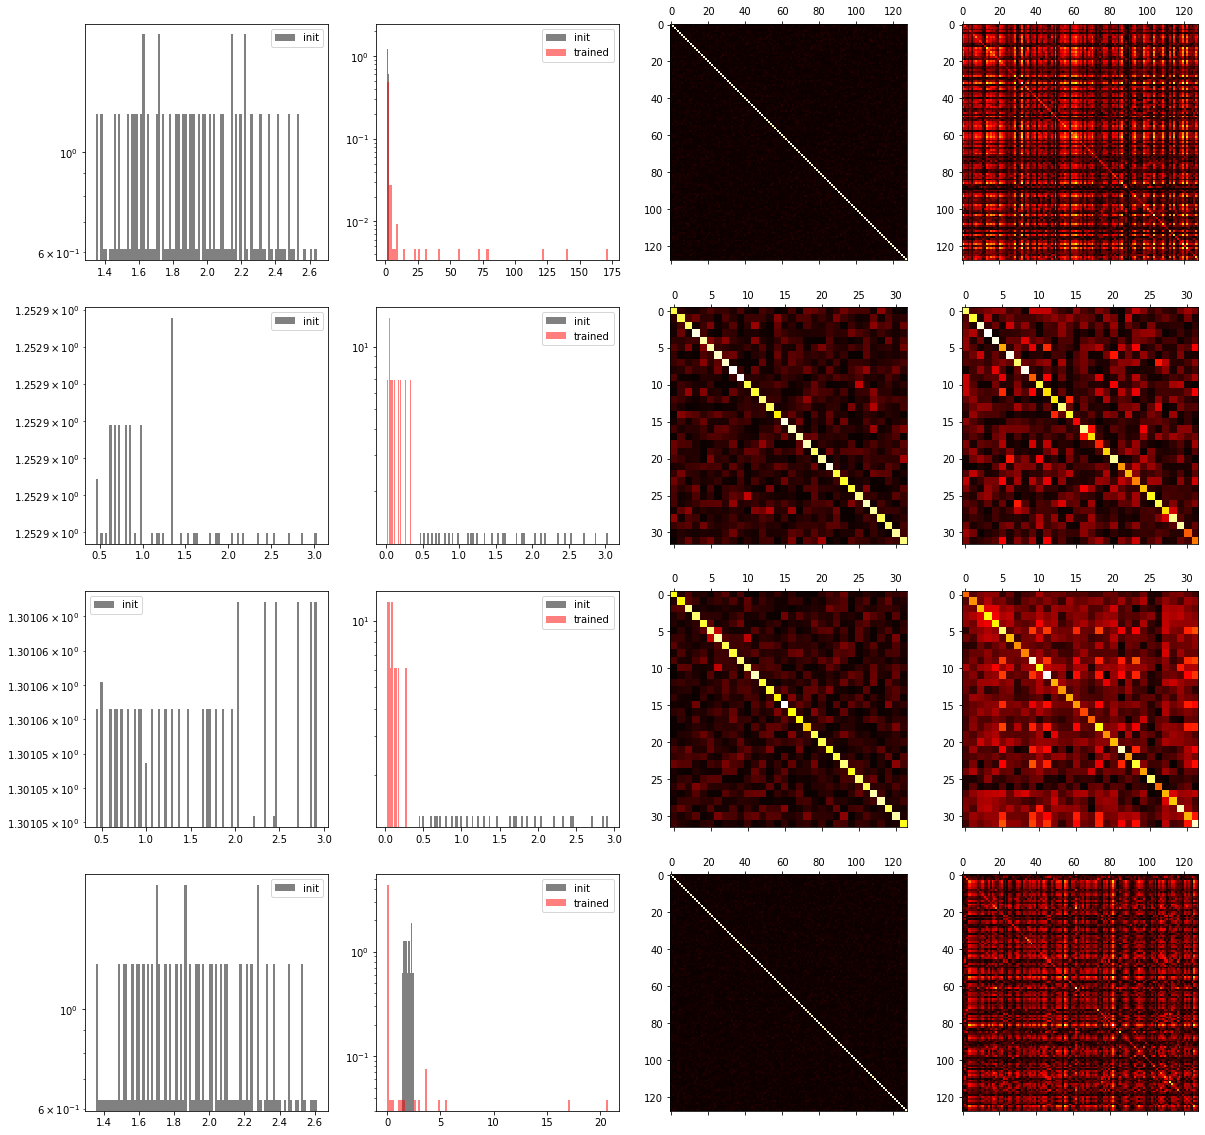

In [54]:
# mse , loss: 0.0025 - val_loss: 0.0016
x_test = -norm_flux
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

### AE norm input

In [35]:
from viska.AEn import NormAE

In [36]:
input_dim, latent_dim = 4096, 32
hidden_units = [128]
# hidden_units = []
# reg1 = 1e-5
reg1 = None
encoder_dp=0.2
lr = 0.001
loss='mae'

In [37]:
model= NormAE(input_dim, latent_dim, hidden_units, reg1=reg1, encoder_dp=encoder_dp, loss=loss, lr=lr)

[4096, 128, 32]
Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
sequential_8 (Sequential)    (None, 128)               524416    
_________________________________________________________________
sequential_9 (Sequential)    (None, 32)                4128      
Total params: 528,544
Trainable params: 528,544
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32)]              0         
_________________________________________________________________
sequential_10 (Sequential)   (None, 128)               4224      
____________________

In [38]:
svs0, covs0 = analyze(model.ae)

In [40]:
# # x_train = flux100k
# x_train = -norm_flux
# # x_train = ae_norm_flux
# model.fit(x_train, ep=200)

In [ ]:
# loss: 0.0078 - val_loss: 0.0065 -- > loss: 0.0061 - val_loss: 0.0061
# input = ae_norm_flux
x_test = ae_norm_flux
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

mse: 0.3921935002227812 | mae: 14.454363205108177 | 


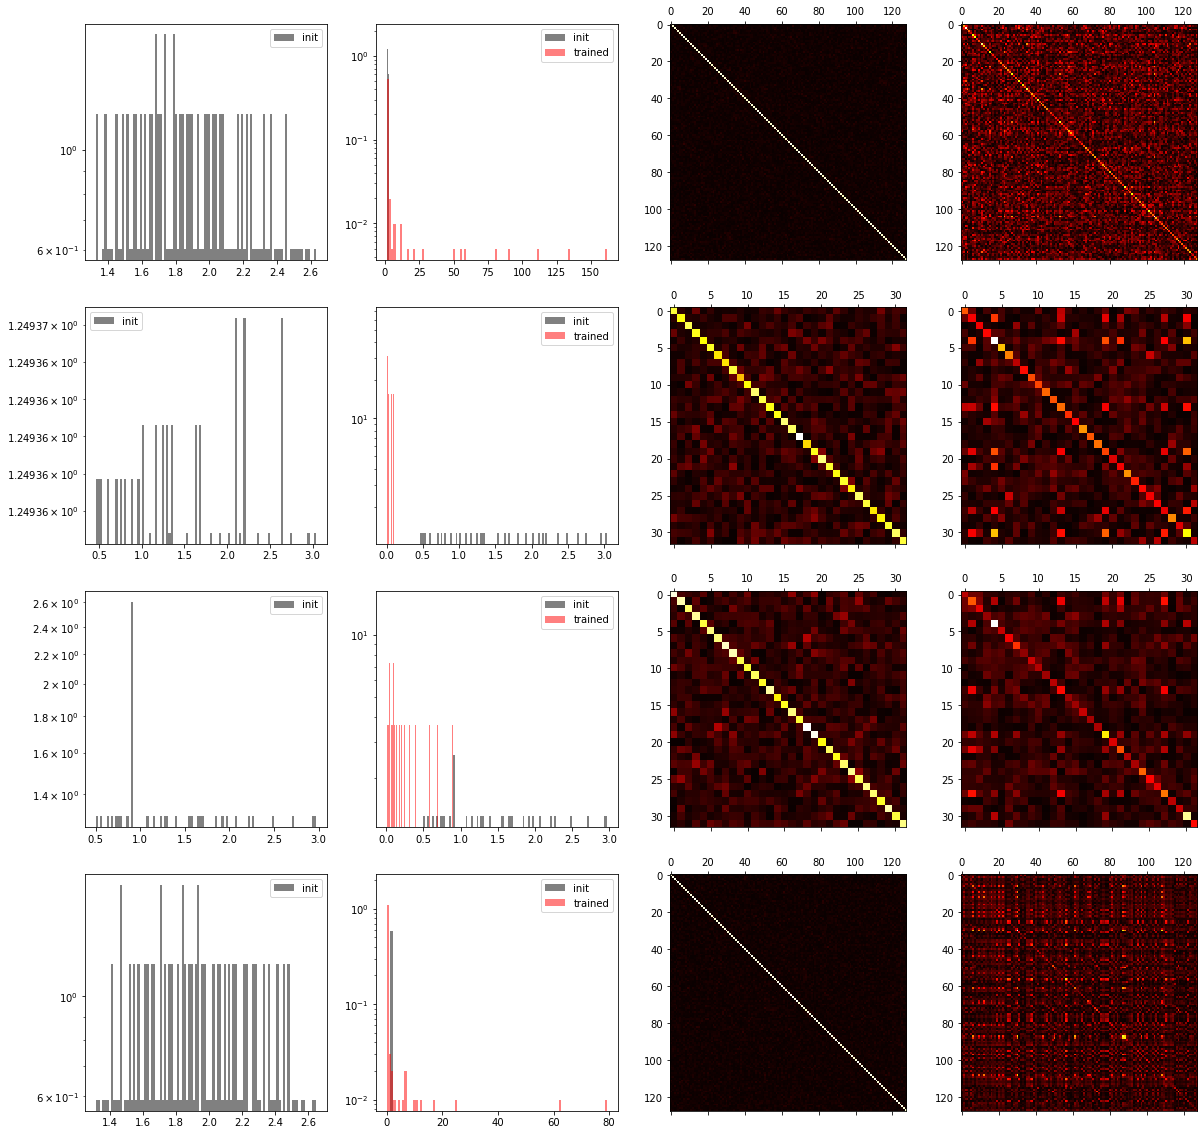

In [34]:
# loss: 0.0078 - val_loss: 0.0065 -- > loss: 0.0061 - val_loss: 0.0061
# input = ae_norm_flux
x_test = ae_norm_flux
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

### DAE dim = 32
'''
dumb AE with one layer

In [259]:
from viska.DAE_mae import DumbAE

In [260]:
latent_dim = 4096
encoder_dp = 0.2
reg1 = 0.00001
lr=0.01
# hidden_units = [128]

In [261]:
ae = DumbAE(latent_dim, encoder_dp, reg1, lr)

[4096, 4096]
Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
encoder (Functional)         (None, 4096)              16781312  
_________________________________________________________________
decoder (Functional)         (None, 4096)              16781312  
Total params: 33,562,624
Trainable params: 33,562,624
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = norm_flux
ae.fit(x_train, ep=500)

Epoch 1/500
5625/5625 [==============================] - 21s 4ms/step - loss: 2.5675 - val_loss: 2.4116
Epoch 2/500
5625/5625 [==============================] - 21s 4ms/step - loss: 2.8356 - val_loss: 3.1832
Epoch 3/500
5625/5625 [==============================] - 20s 4ms/step - loss: 2.8897 - val_loss: 2.7892
Epoch 4/500
5625/5625 [==============================] - 20s 4ms/step - loss: 2.8700 - val_loss: 2.0881
Epoch 5/500
5625/5625 [==============================] - 20s 4ms/step - loss: 0.2835 - val_loss: 0.2337
Epoch 6/500
5625/5625 [==============================] - 20s 4ms/step - loss: 0.2195 - val_loss: 0.1581
Epoch 7/500
5625/5625 [==============================] - 20s 4ms/step - loss: 0.1616 - val_loss: 0.1214
Epoch 8/500
5625/5625 [==============================] - 20s 4ms/step - loss: 0.1195 - val_loss: 0.0909
Epoch 9/500
5625/5625 [==============================] - 20s 4ms/step - loss: 0.0946 - val_loss: 0.0679
Epoch 10/500
5625/5625 [==============================] - 21s 4m

mse: 1.1222821282125368 | mae: 67.66941364713671 | 


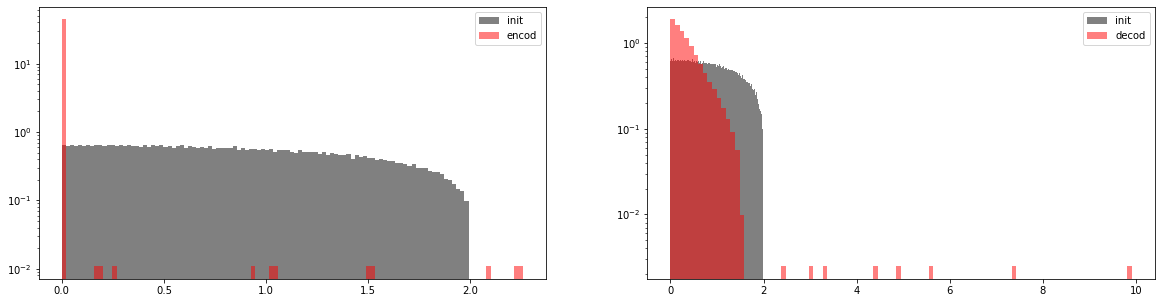

In [264]:
_,_,_ = get_ae_errs(x_train, ae)
svs_train = get_svs(ae, svs=[])
plot_esd(svs_init, svs_train=svs_train)

mse: 1.1549650595850678 | mae: 64.36186896450843 | 


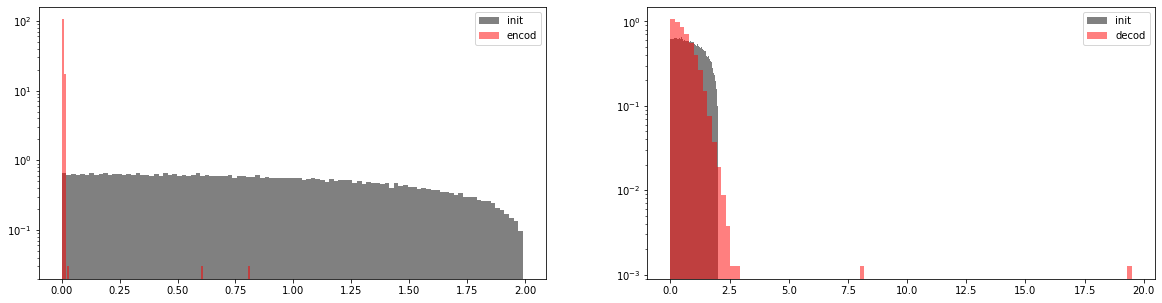

In [258]:
#  loss: 0.0387 - val_loss: 0.0255
_,_,_ = get_ae_errs(x_train, ae)
svs_train = get_svs(ae, svs=[])
plot_esd(svs_init, svs_train=svs_train)

In [ ]:
ae.fit(x_train, ep=50)

mse: 1.7550928764385683 | mae: 89.43512274684832 | 


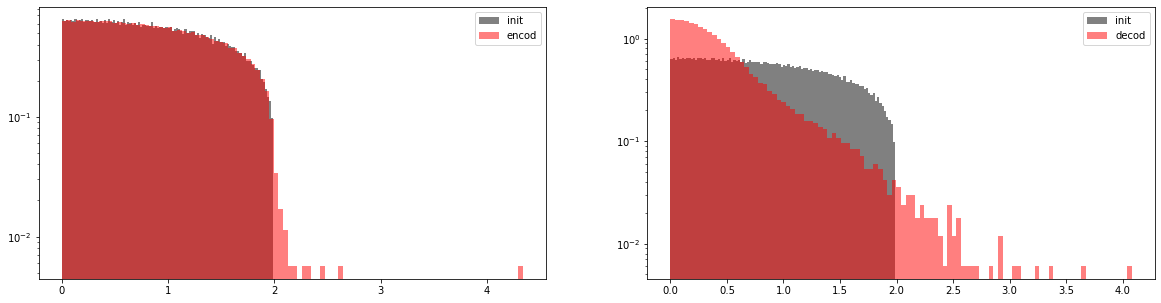

In [247]:
#  loss: 0.0387 - val_loss: 0.0255
_,_,_ = get_ae_errs(x_train, ae)
svs_train = get_svs(ae, svs=[])
plot_esd(svs_init, svs_train=svs_train)

In [234]:
# svs_init = get_svs(ae, svs=[])

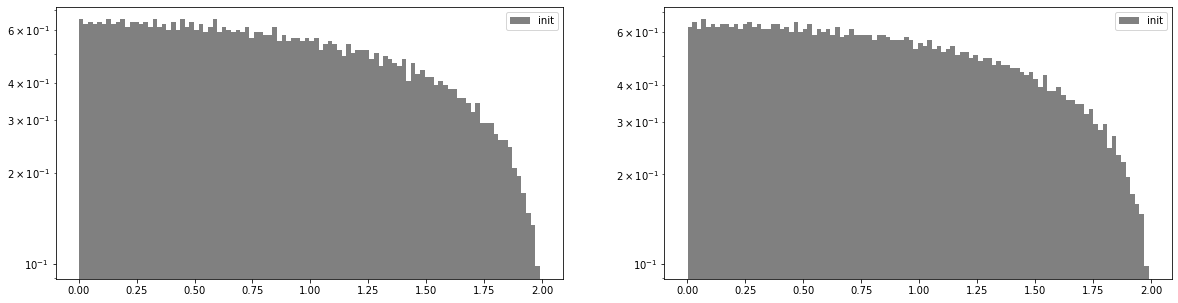

In [235]:
# plot_esd(svs_init, svs_train=None)

In [240]:
x_train = norm_flux
ae.fit(x_train, ep=300)

Epoch 1/300
5625/5625 [==============================] - 24s 4ms/step - loss: 0.2506 - val_loss: 0.2530
Epoch 2/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.2229 - val_loss: 0.2153
Epoch 3/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.2206 - val_loss: 0.2390
Epoch 4/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.2191 - val_loss: 0.2204
Epoch 5/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.2179 - val_loss: 0.2178
Epoch 6/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.2178 - val_loss: 0.2133
Epoch 7/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.2153 - val_loss: 0.2057
Epoch 8/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.2155 - val_loss: 0.2054
Epoch 9/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.2139 - val_loss: 0.2113
Epoch 10/300
5625/5625 [==============================] - 23s 4m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5625/5625 [==============================] - 22s 4ms/step - loss: 0.1588 - val_loss: 0.1725
Epoch 95/300
5625/5625 [==============================] - 22s 4ms/step - loss: 0.1585 - val_loss: 0.1504
Epoch 96/300
5625/5625 [==============================] - 22s 4ms/step - loss: 0.1581 - val_loss: 0.1642
Epoch 97/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.1569 - val_loss: 0.1434
Epoch 98/300
5625/5625 [==============================] - 22s 4ms/step - loss: 0.1565 - val_loss: 0.1554
Epoch 99/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.1560 - val_loss: 0.1491
Epoch 100/300
5625/5625 [==============================] - 22s 4ms/step - loss: 0.1558 - val_loss: 0.1503
Epoch 101/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.1554 - val_loss: 0.1568
Epoch 102/300
5625/5625 [==============================] - 23s 4ms/step - loss: 0.1552 - val_loss: 0.2022
Epoch 103/300
5625/5625 [==============================] - 23s 4m

mse: 1.0969811297100405 | mae: 47.869073009583666 | 


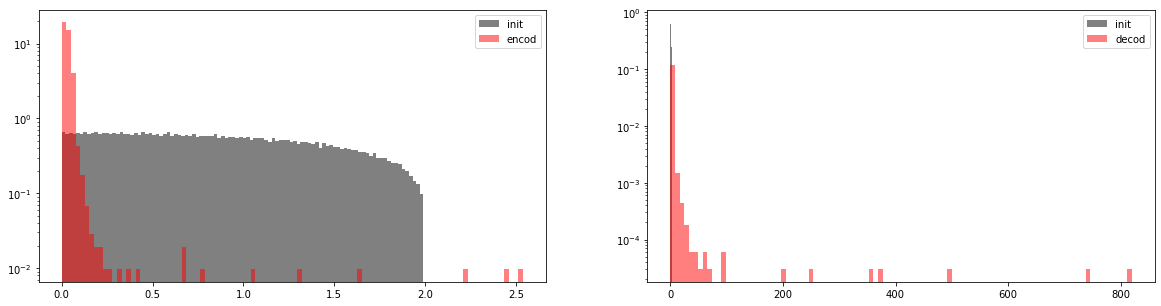

In [241]:
# 4096-4096-4096 dp =0.2/0.2  reg1=1e-5 lr=0.01 
#  loss: 0.0062 - val_loss: 0.0044
_,_,_ = get_ae_errs(x_train, ae)
svs_train = get_svs(ae, svs=[])
plot_esd(svs_init, svs_train=svs_train)

In [ ]:
_ = ww_4096(ae, rds)

In [242]:
svs_train

[array([2.5386257e+00, 2.4622564e+00, 2.2197368e+00, ..., 2.5481271e-05,
        1.9975787e-05, 1.3698873e-05], dtype=float32),
 array([8.1950018e+02, 7.4128009e+02, 4.9607117e+02, ..., 1.7698915e-03,
        5.2302366e-04, 8.7401459e-05], dtype=float32)]

mse: 0.22766372636132387 | mae: 9.981029700476107 | 


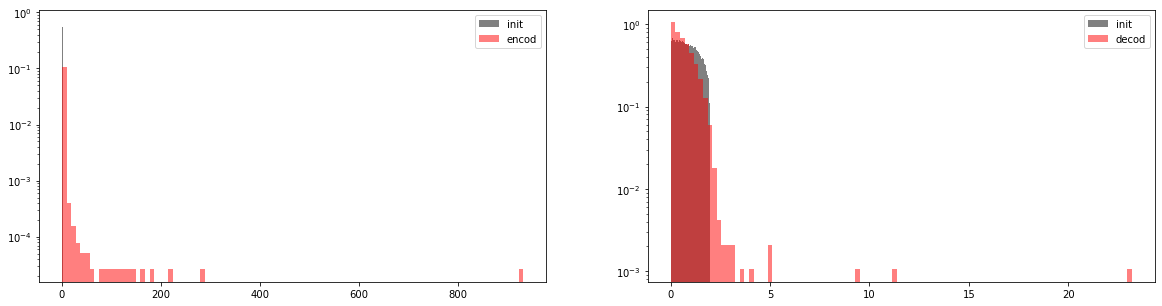

In [231]:
# 4096-4096-4096 dp =0.2/0.2  reg1=None lr=0.01 
#  loss: 0.0062 - val_loss: 0.0044
_,_,_ = get_ae_errs(x_train, ae)
svs_train = get_svs(ae, svs=[])
plot_esd(svs_init, svs_train=svs_train)

In [217]:
# 4096-4096-4096 dp =0.1/0.  reg1=None lr=0.01 
#  loss: 0.0077 - val_loss: 0.0044
_,_,_ = get_ae_errs(x_train, ae)

mse: 0.20872150132230669 | mae: 9.62127152187521 | 


In [219]:
svs_train = get_svs(ae, svs=[])

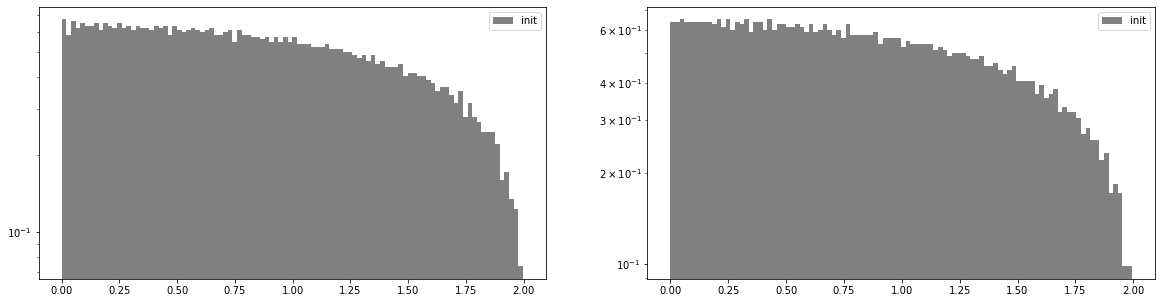

In [223]:
plot_esd(svs_init, svs_train=None)

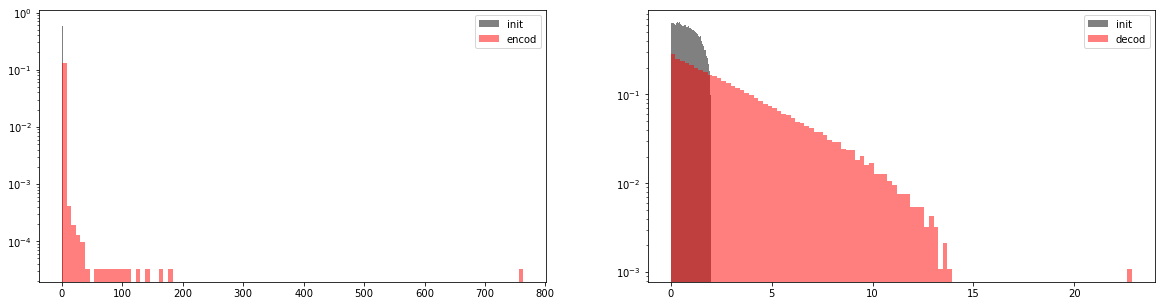

In [222]:
plot_esd(svs_init, svs_train=svs_train)

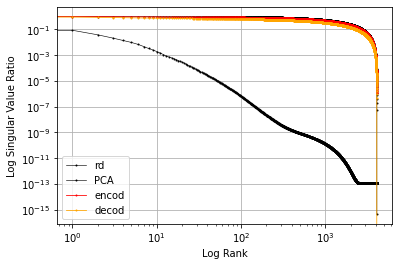

In [243]:
_ = ww_4096(ae, rds)

In [178]:
# 4096-4096-4096 dp =0.2/0.  reg1=0 lr=0.001 
#  loss: 0.0075 - val_loss: 0.0045
_,_,_ = get_ae_errs(x_train, ae)

mse: 0.1718239799734375 | mae: 9.623733435866852 | 


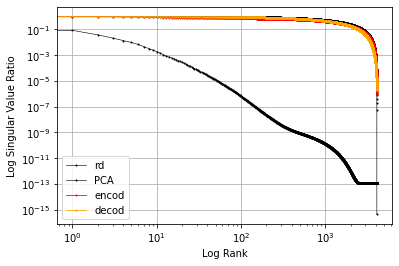

In [179]:
_ = ww_4096(ae, rds)

In [173]:
# 4096-4096-4096 dp =0.2/0.1  reg1=0 lr=0.001 
#  loss: 0.0075 - val_loss: 0.0045
_,_,_ = get_ae_errs(x_train, ae)

mse: 0.1897605832839456 | mae: 10.997958211804182 | 


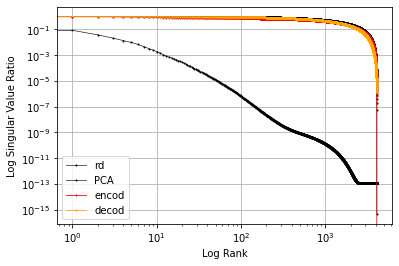

In [174]:
_ = ww_4096(ae, rds)

In [166]:
# 4096-4096-4096 dp0.1 / 0.05 reg1=0 lr=0.01 
#  loss: 0.0075 - val_loss: 0.0045
_,_,_ = get_ae_errs(x_train, ae_m32_dp01)

mse: 0.21330144202399334 | mae: 11.10950862117254 | 


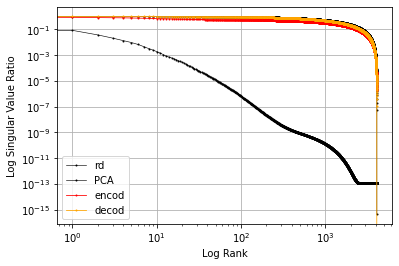

In [167]:
_ = ww_4096(ae_m32_dp01, rds)

In [147]:
# 4096-4096-4096 dp=0.1 reg1=0 lr=0.01  l = 0.00
# 20s 4ms/step - loss: 0.0075 - val_loss: 0.0045
_,_,_ = get_ae_errs(x_train, ae_m32)

mse: 0.12096690594434495 | mae: 4.576152027799484 | 


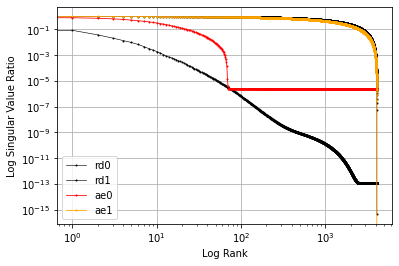

In [138]:
svs = ww_4096(ae_m32, rds)

In [115]:
# 4096-4096-4096 dp=0.05 reg1=0 lr=0.01  l = 0.00
# 20s 4ms/step - loss: 0.0075 - val_loss: 0.0045
_,_,_ = get_ae_errs(x_train, ae_m32)

mse: 0.1263701301512037 | mae: 5.160230162268686 | 


In [110]:
# 4096-4096-4096 dp=0.05 reg1=0 lr=0.01  l = 0.00
# 20s 4ms/step - loss: 0.0075 - val_loss: 0.0045
_,_,_ = get_ae_errs(x_train, ae_m32)

mse: 0.21130362106671846 | mae: 10.80495796708898 | 


In [ ]:
ae_m32.

In [100]:
# 4096-4096-4096 dp=0 reg1=0 l = 0.0090
_,_,_ = get_ae_errs(x_train, ae_m32)

mse: 0.2969735188759032 | mae: 13.838394060543704 | 


In [79]:
#17M
ae_v32,_,_ = get_ae_errs(x_train, ae_m32)

mse: 4.476649752925331 | mae: 164.89362969407603 | 


In [36]:
# 19M 
ae_v32,_,_ = get_ae_errs(x_train, ae_m32)

mse: 0.4153305218442294 | mae: 13.625532586395622 | 


### DAE dim = 32

In [15]:
from viska.DAE import DumbAE

In [43]:
latent_dim = 32

In [37]:
model = DumbAE(latent_dim)

[4096, 32]
Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
encoder (Functional)         (None, 32)                131104    
_________________________________________________________________
decoder (Functional)         (None, 4096)              135168    
Total params: 266,272
Trainable params: 266,272
Non-trainable params: 0
_________________________________________________________________


In [39]:
# x_train = 1 - x_train
m = model
m.fit(x_train, ep=25)

Epoch 1/25
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 2/25
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 3/25
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 4/25
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 5/25
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/25
5625/5625 [==============================] - 6s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 7/25
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/25
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/25
5625/5625 [==============================] - 6s 1ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 10/25
5625/5625 [==============================] - 7s 1ms/step - loss: 0.001

In [40]:
m = model
ae_val = m.ae.predict(x_train)

In [41]:
mse_err = np.sqrt(np.sum((x_train - ae_val)**2, axis = 1)).mean()
mae_err = np.sum(abs(x_train - ae_val), axis = 1).mean()

mse_err, mae_err

(0.12142839055315448, 4.425384645032142)

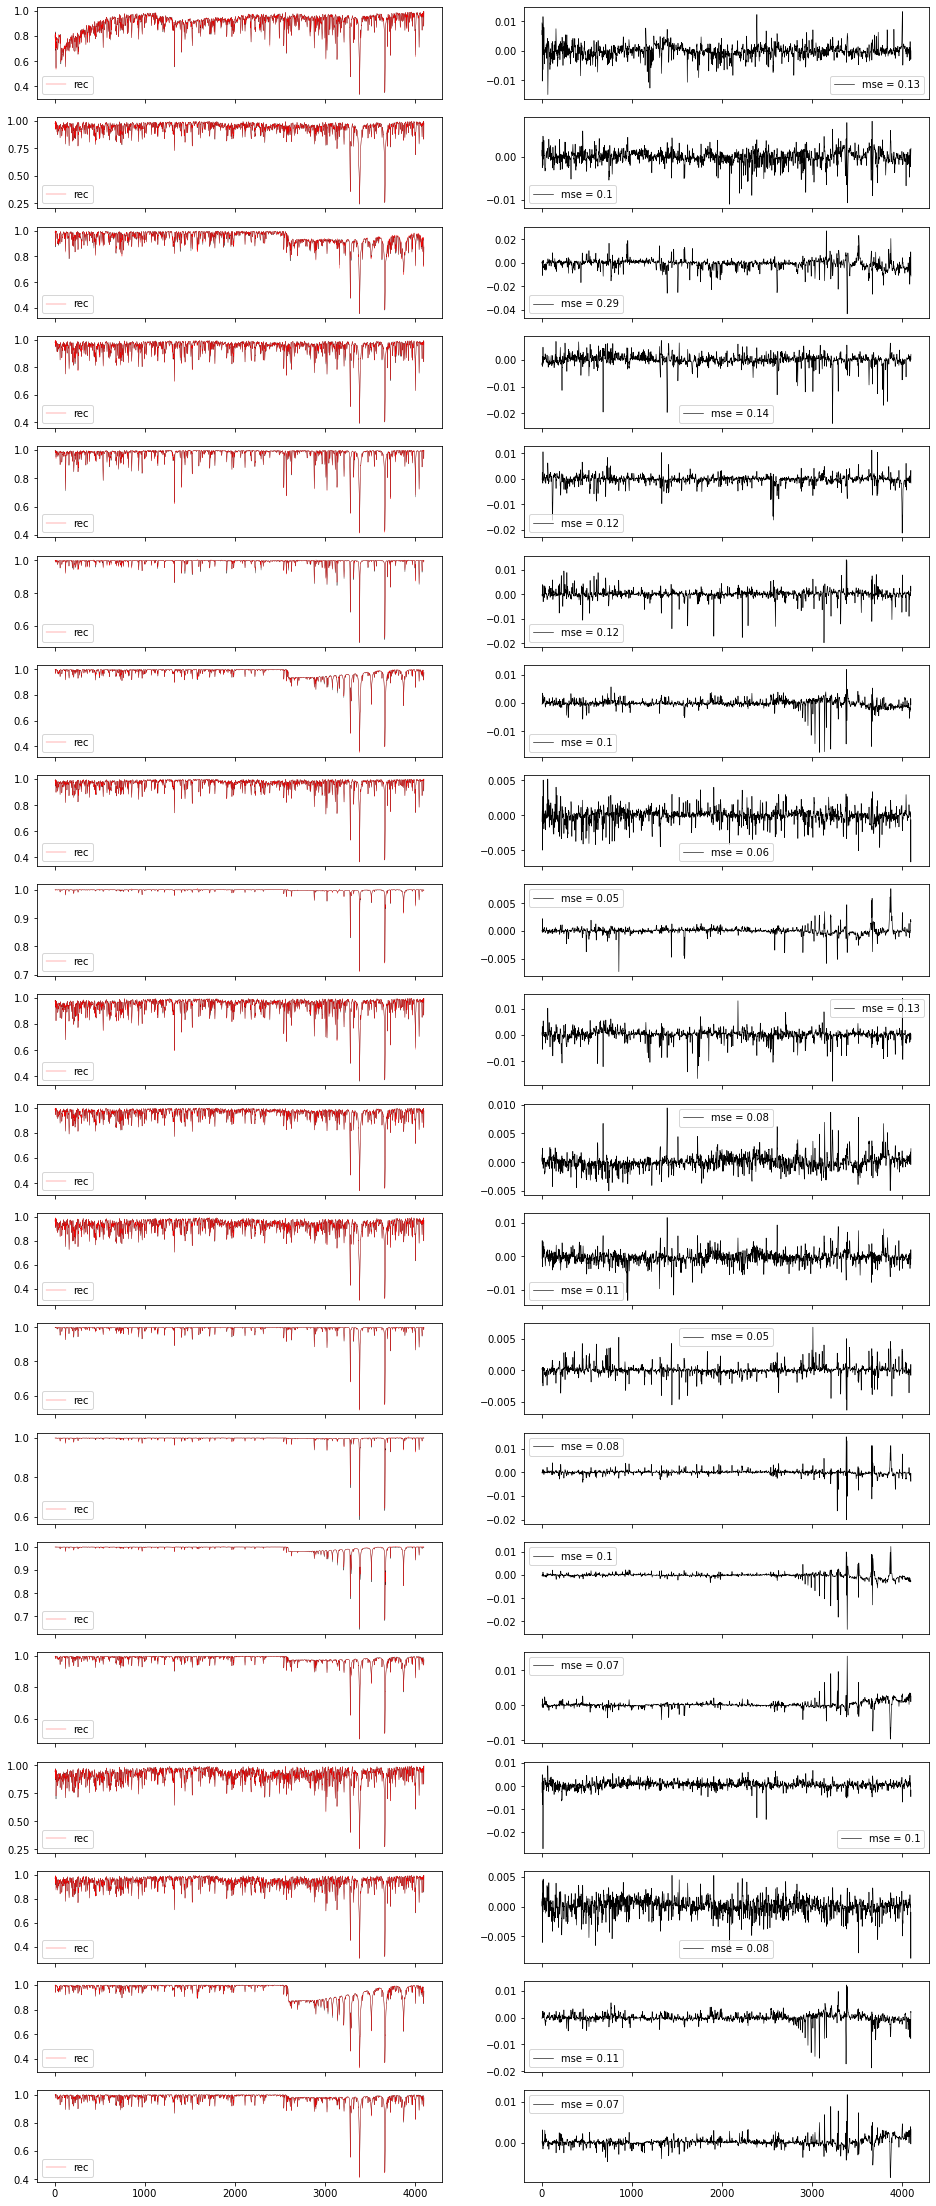

In [42]:
plot_rec(x_train, ae_val, N=20, label='rec')

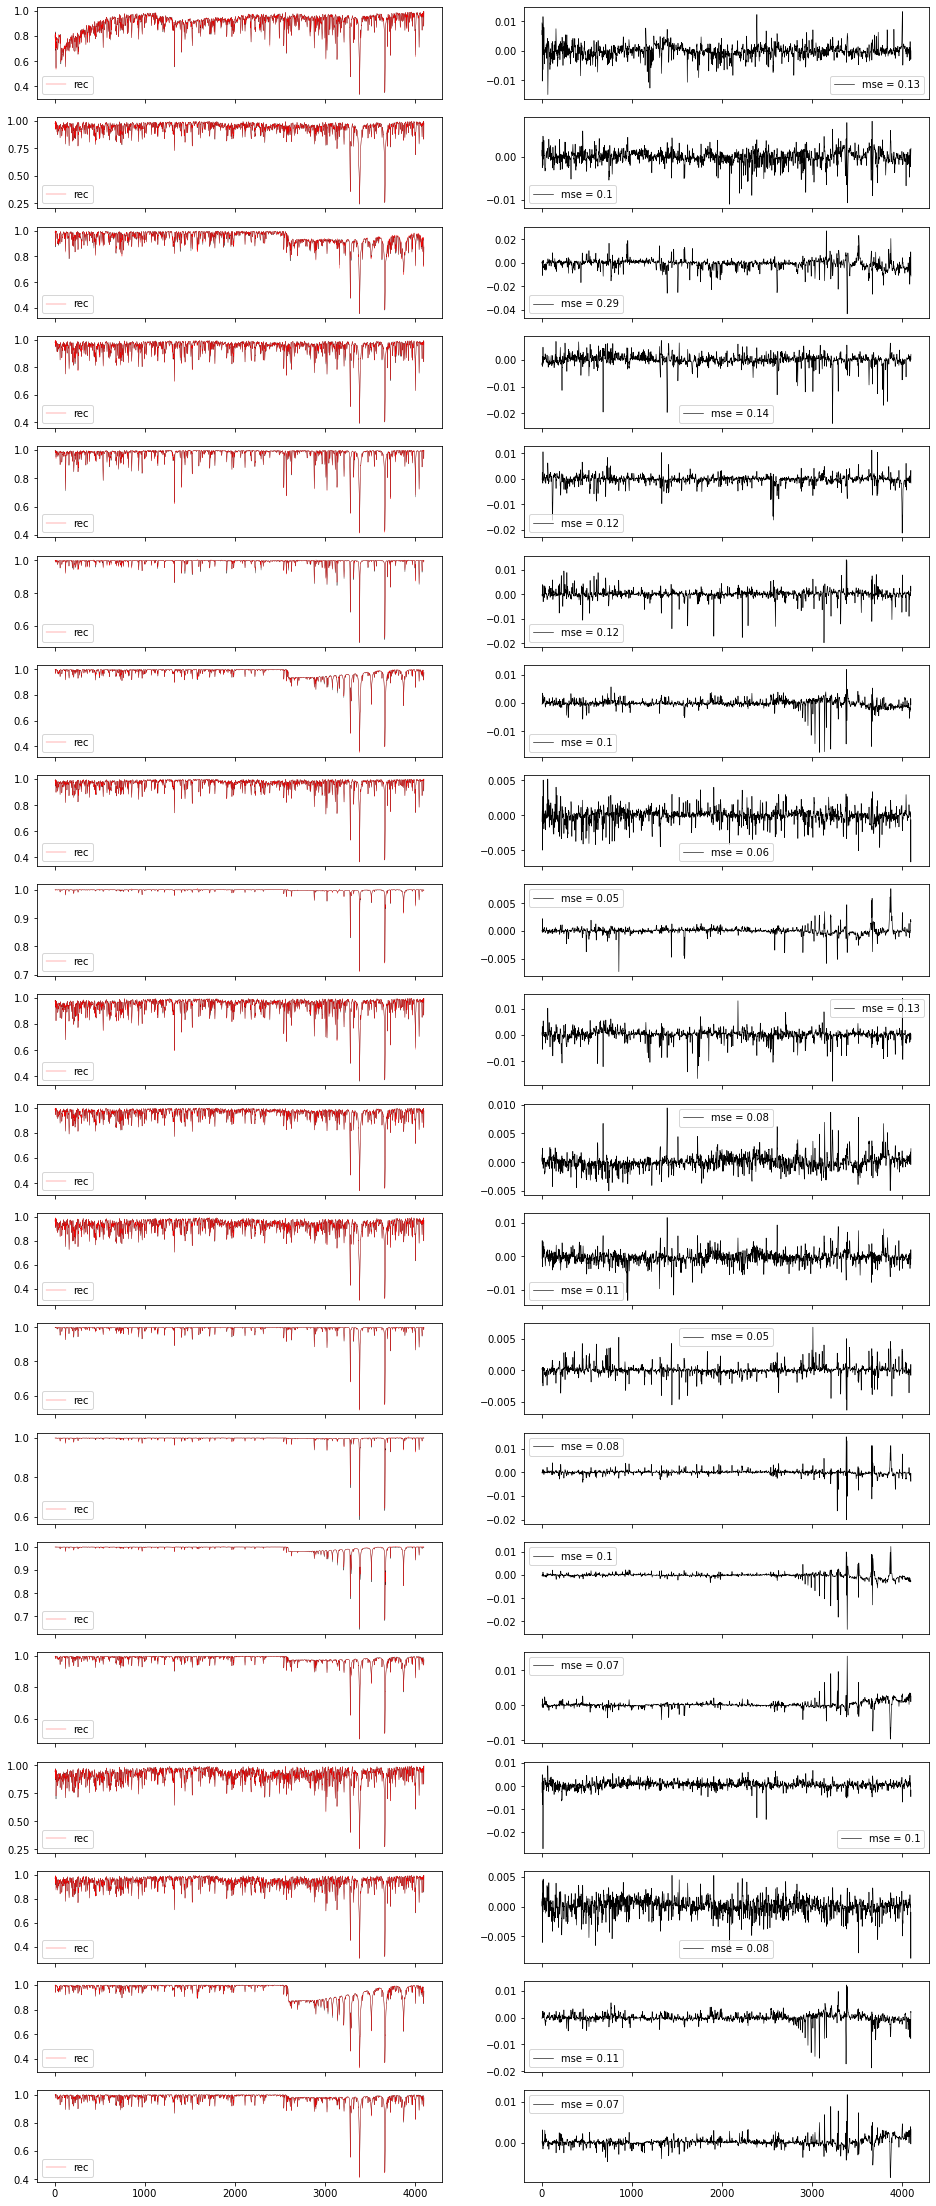

In [42]:
plot_rec(x_train, ae_val, N=20, label='rec')

### AE dim = 8

In [53]:
from viska.DAE_mae import DumbAE

In [47]:
latent_dim = 8

In [48]:
m8 = DumbAE(latent_dim)

[4096, 8]
Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
encoder (Functional)         (None, 8)                 32776     
_________________________________________________________________
decoder (Functional)         (None, 4096)              36864     
Total params: 69,640
Trainable params: 69,640
Non-trainable params: 0
_________________________________________________________________


In [49]:
# x_train = 1 - x_train
m8.fit(x_train, ep=30)

Epoch 1/30
5625/5625 [==============================] - 6s 1ms/step - loss: 0.0220 - val_loss: 0.0202
Epoch 2/30
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0127 - val_loss: 0.0106
Epoch 3/30
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 4/30
5625/5625 [==============================] - 6s 1ms/step - loss: 0.0092 - val_loss: 0.0111
Epoch 5/30
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0088 - val_loss: 0.0159
Epoch 6/30
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0086 - val_loss: 0.0104
Epoch 7/30
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0086 - val_loss: 0.0067
Epoch 8/30
5625/5625 [==============================] - 6s 1ms/step - loss: 0.0084 - val_loss: 0.0072
Epoch 9/30
5625/5625 [==============================] - 7s 1ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 10/30
5625/5625 [==============================] - 7s 1ms/step - loss: 0.008

mse: 0.37683082601617374 | mae: 12.70632499113208 | 


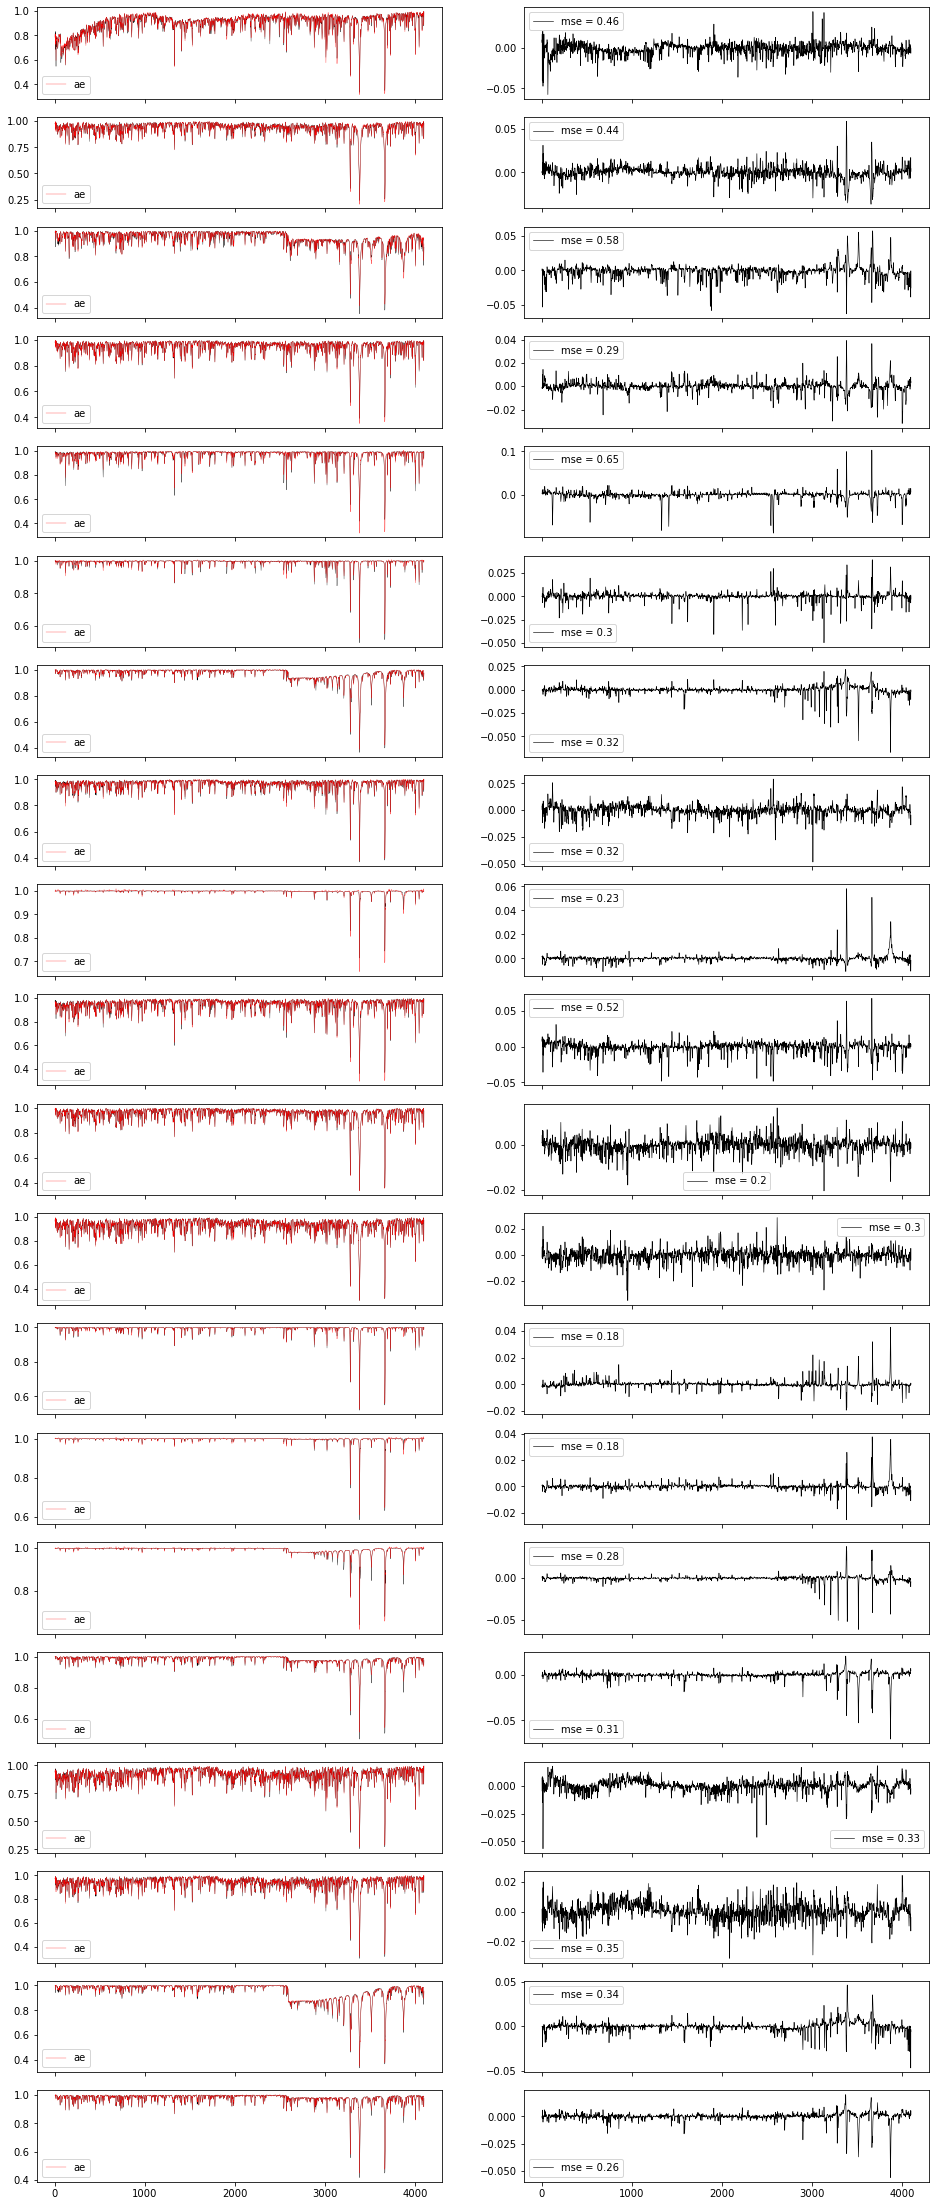

In [52]:
ae_val8 = get_errs(x_train, m8)

mse: 0.3753437655284042 | mae: 12.630768040455798 | 


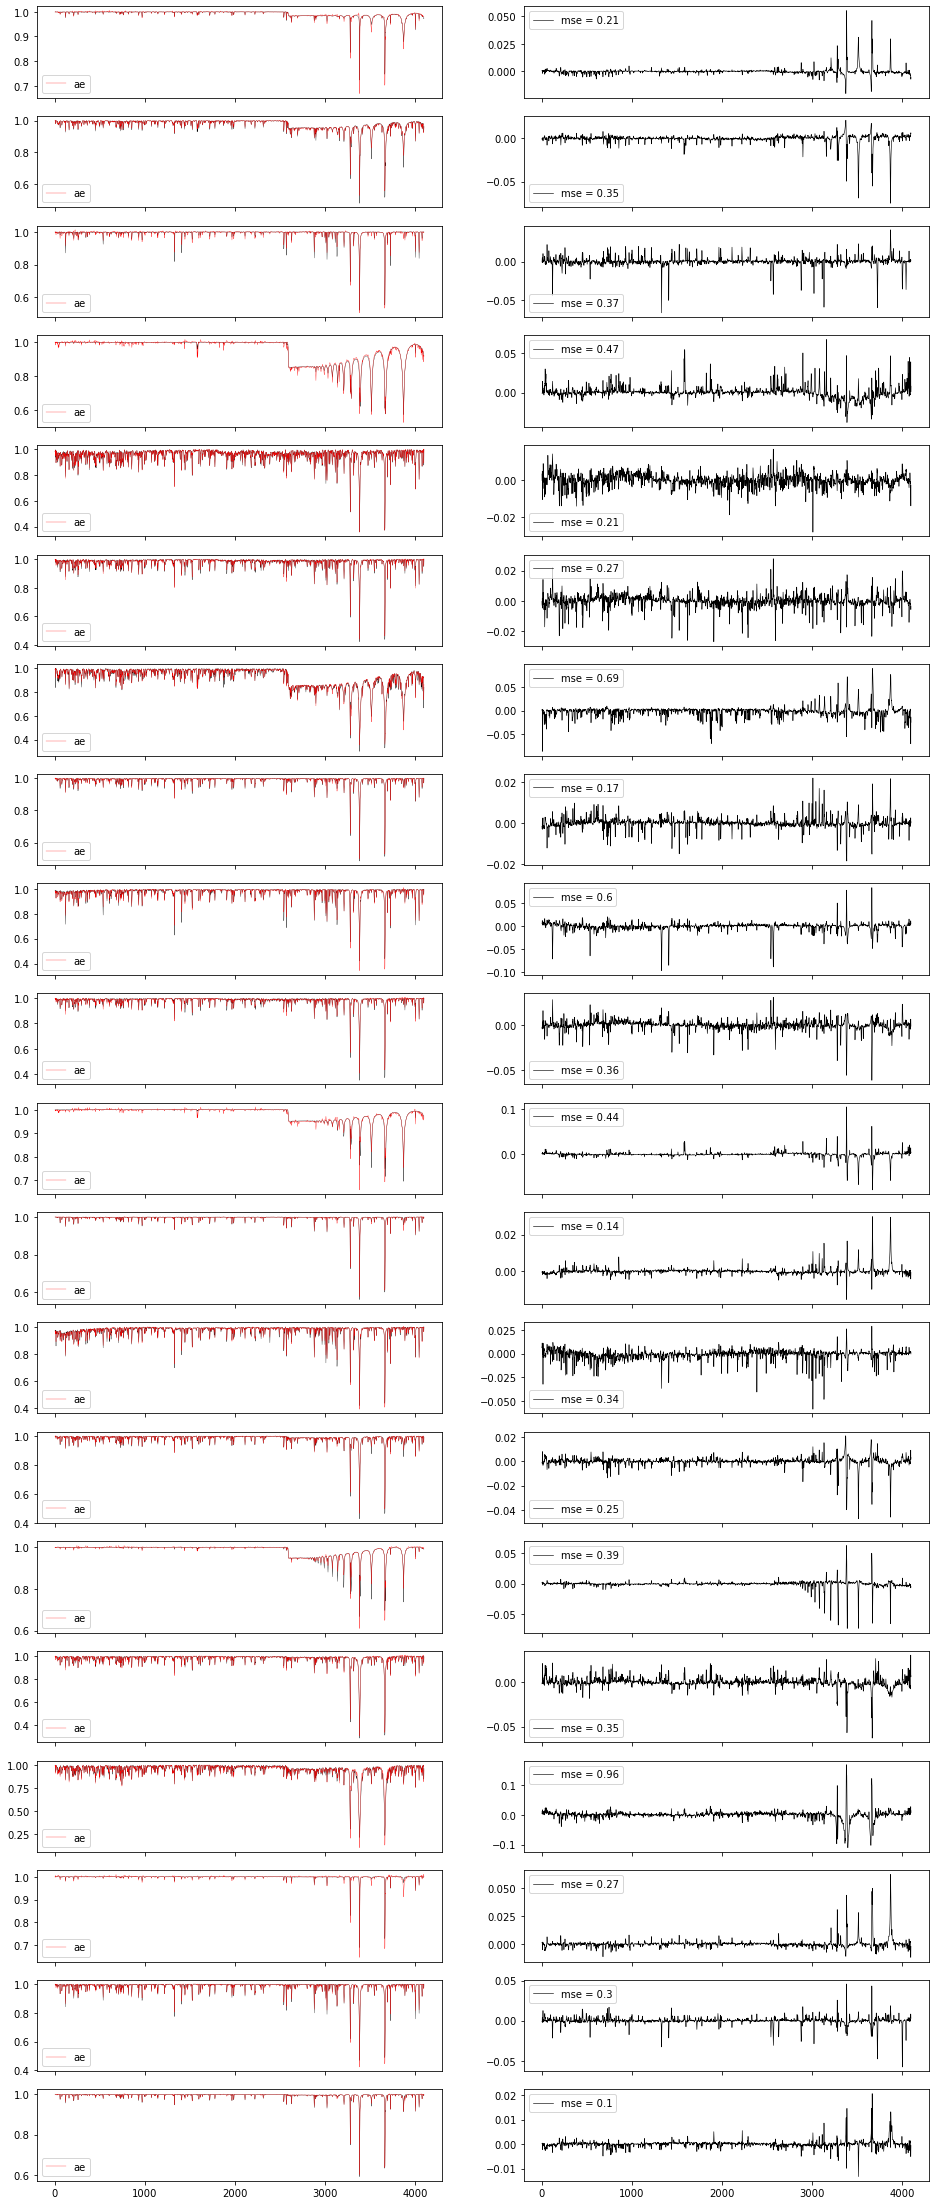

In [58]:
ae_pred8 = get_errs(x_test, m8)

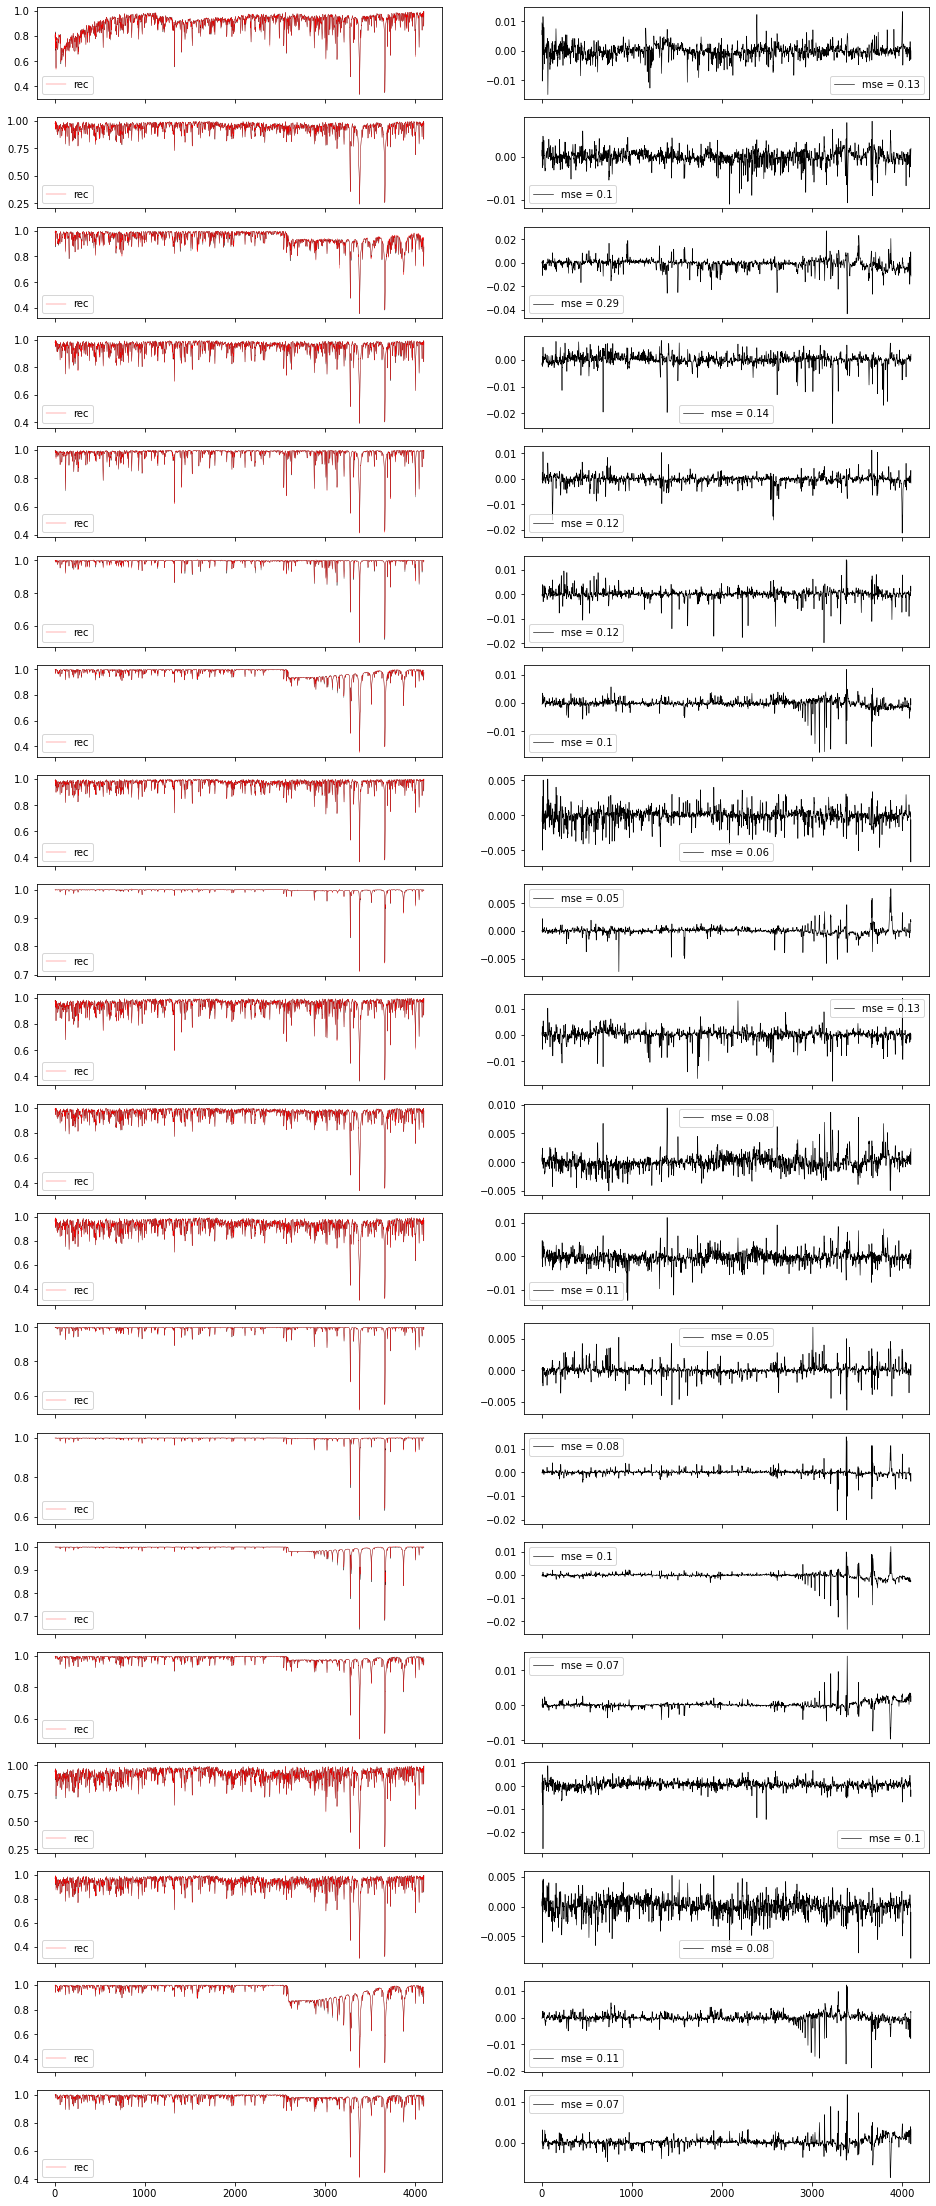

In [42]:
plot_rec(x_train, ae_val, N=20, label='rec')

### Eval

In [217]:
np.max(np.log(v_flux + 1) / np.log(2))

1.0089044535484324

In [215]:
np.max(v_flux +1 )

1.0123823670188117

In [213]:
x_test = 1 - np.log(v_flux + 1) / np.log(2)
np.max(x_test), x_test.shape

(0.8888504495861103, (10000, 4096))

In [54]:
x_test

array([[0.99963331, 0.99969046, 0.99971612, ..., 0.97294537, 0.97190207,
        0.97374585],
       [0.99872751, 0.9994704 , 0.99975908, ..., 0.92808307, 0.93961593,
        0.96563437],
       [0.9987378 , 0.99949994, 0.99943323, ..., 0.99800174, 0.99707528,
        0.99973151],
       ...,
       [0.97581195, 0.98311608, 0.96037371, ..., 0.90718333, 0.85332371,
        0.99476012],
       [0.98655114, 0.9935221 , 0.99251664, ..., 0.8037149 , 0.81935527,
        0.9456633 ],
       [0.98676043, 0.98975484, 0.97047664, ..., 0.94182771, 0.90135984,
        0.99830604]])

In [ ]:
get_e

In [26]:
# x_test = 1 - v_flux
ae_pred = m8.ae.predict(x_test)

In [27]:
err = np.sqrt(np.sum((x_test - ae_pred)**2, axis = 1)).mean()
err

0.16604516175632816

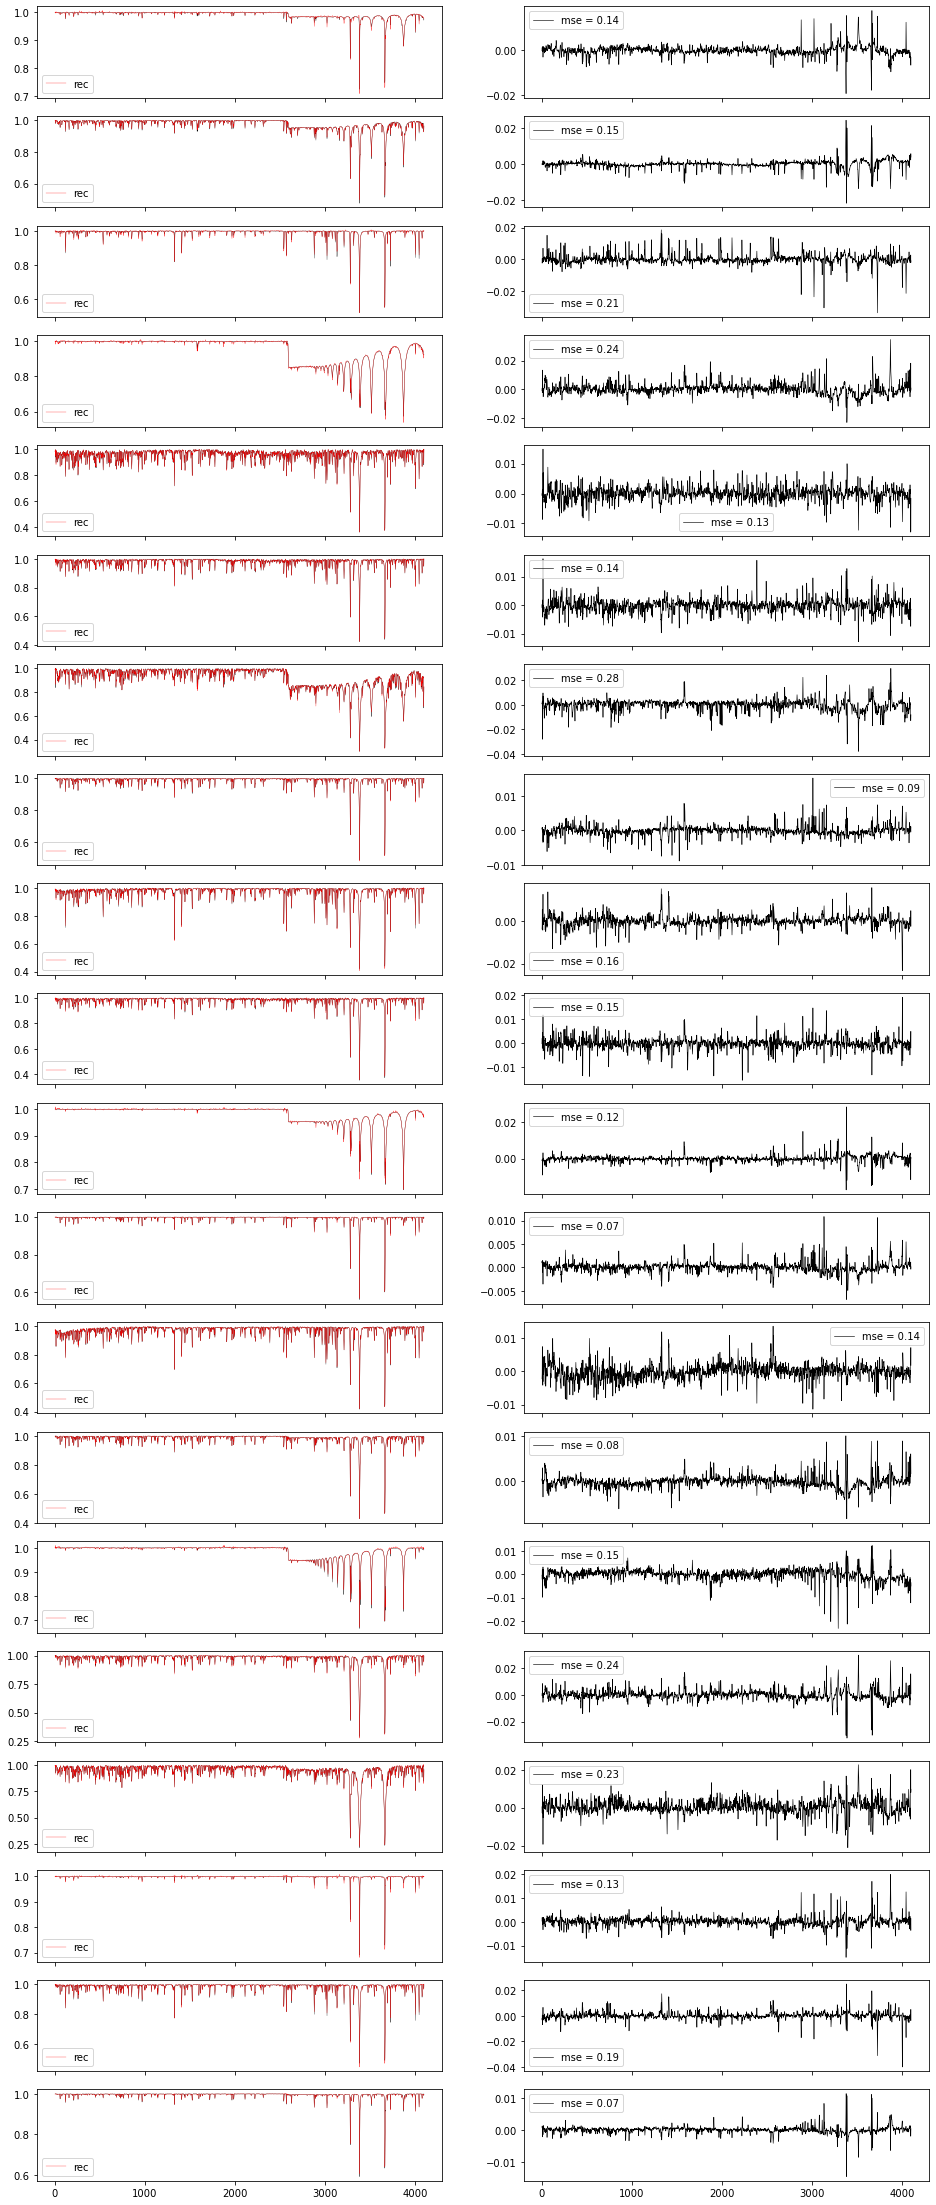

In [28]:
plot_rec(x_test, ae_pred, N=20, label='rec')

### PCA

In [29]:
with h5py.File(TRAIN_PATH, 'r') as f:
    u_train = f['U'][()]

In [30]:
with h5py.File(TEST_PATH, 'r') as f:
    pca_test = f['X'][()]

In [44]:
latent_dim = 8

In [45]:
U_keep = u_train[:, :latent_dim]
pca_pred = (pca_test.dot(U_keep)).dot(U_keep.T)

In [46]:
mse_err = np.sqrt(np.sum((pca_test - pca_pred)**2, axis = 1)).mean()
mae_err = np.sum(abs(pca_test - pca_pred), axis = 1).mean()

mse_err, mae_err

(0.42656953691984056, 17.851924139464657)

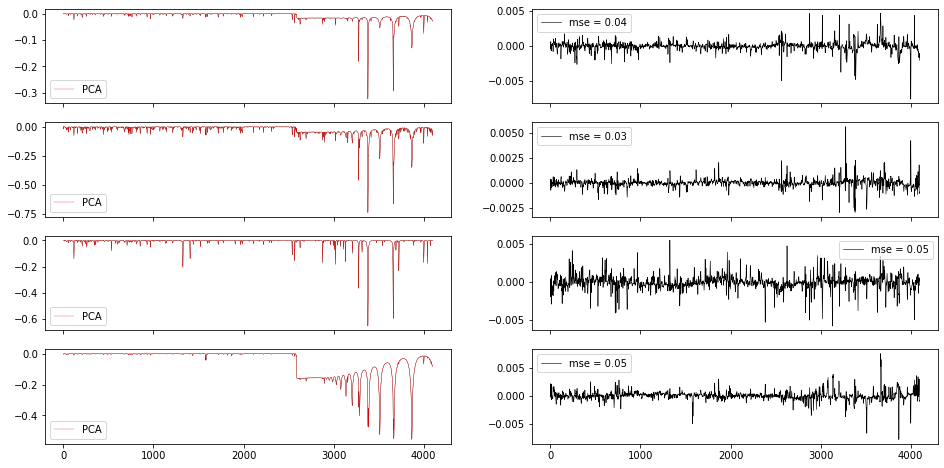

In [35]:
plot_pca_rec(pca_test, pca_pred, N=4)

### Latent Space

# Calculate principal components and expand on truncated basis

In [95]:
M = 50

PC = np.dot(X, U[:, 0:M])
PC.shape

(10000, 50)

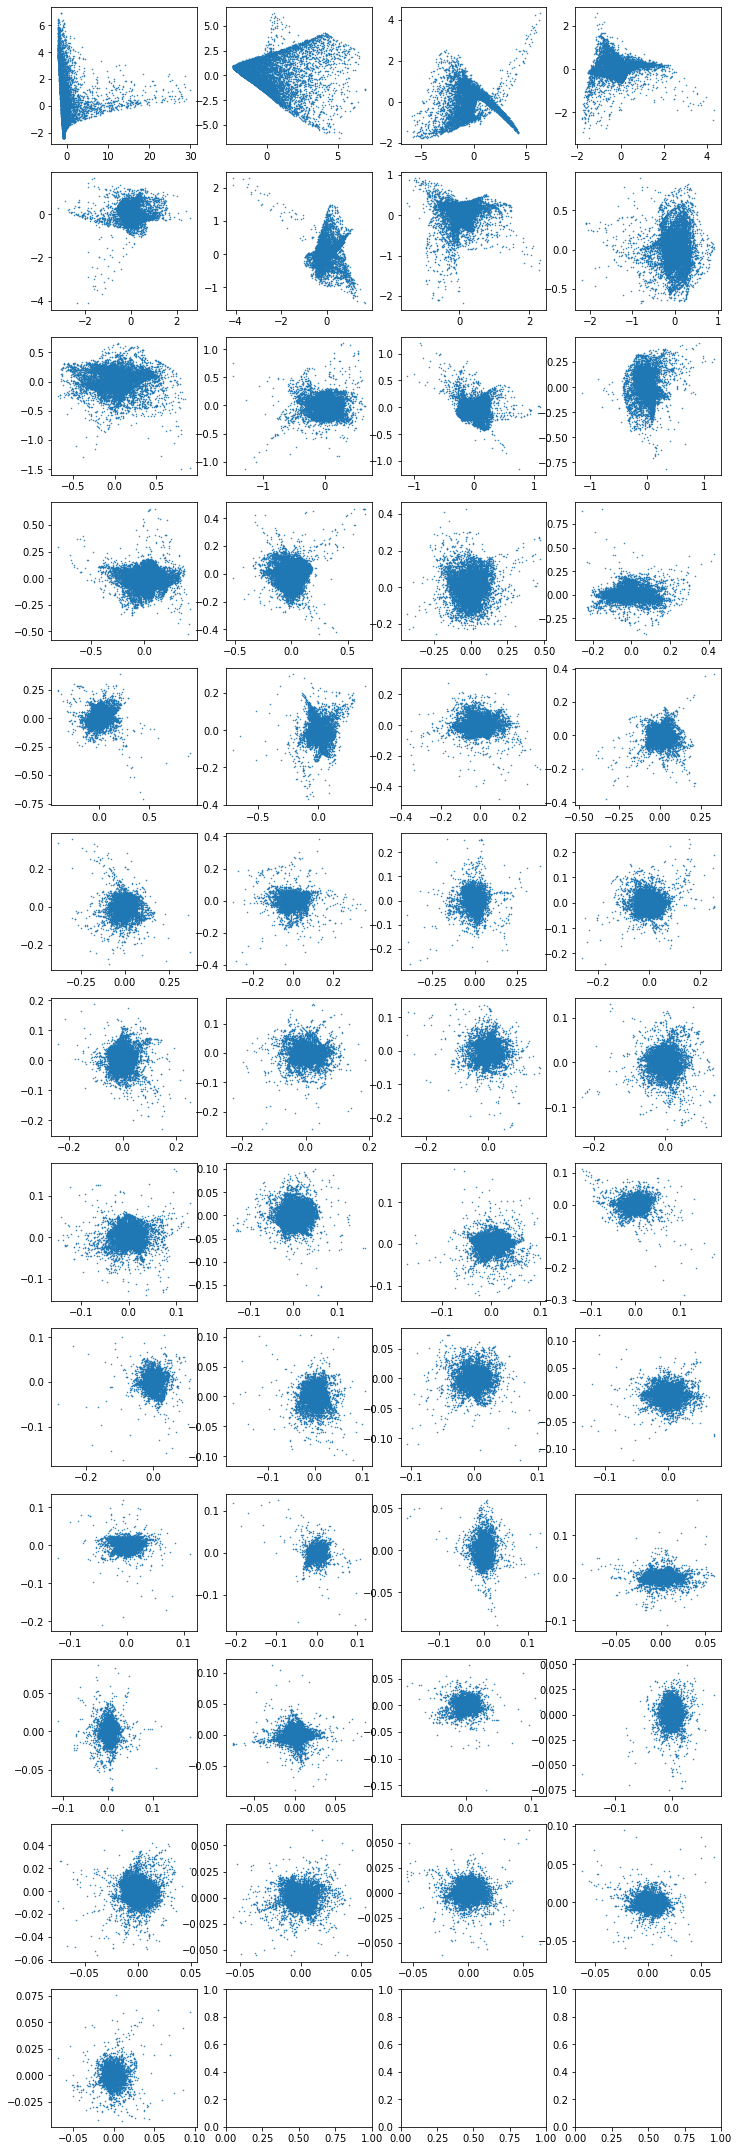

In [96]:
f, axs = plt.subplots(int(np.ceil(M / 4)), 4, figsize=(12, 3 * np.ceil(M / 4)))
axs = axs.flatten()

for i in range(M - 1):
    axs[i].plot(PC[:, i], PC[:, i + 1], '.', ms=1)

# Reconstruct from truncated basis

In [100]:
rflux = np.exp(avg + np.dot(PC, U[:, 0:M].transpose()))
rflux.shape

(10000, 4096)

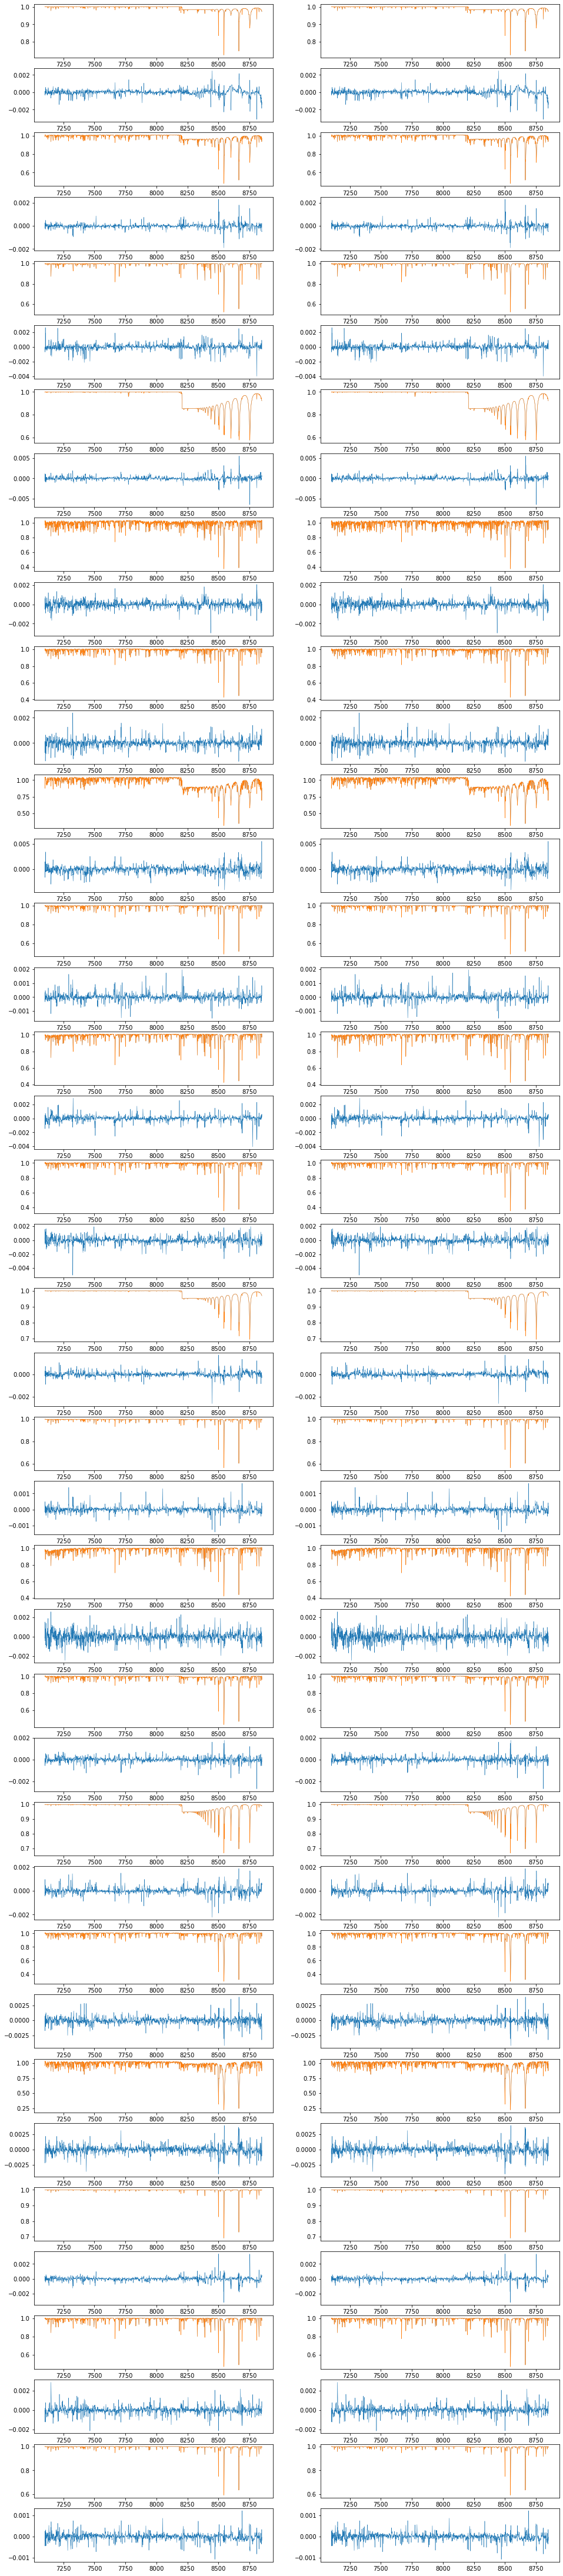

In [101]:
N = 20
f, axs = plt.subplots(2 * N, 2, figsize=(16, 4 * N), squeeze=False)

for i in range(N):
    axs[2 * i, 0].plot(wave, flux[i, :], lw=0.3)
    axs[2 * i, 0].plot(wave, rflux[i, :], lw=0.6)
    
    axs[2 * i, 1].plot(wave, flux[i, :], lw=0.3)
    axs[2 * i, 1].plot(wave, rflux[i, :], lw=0.6)
#     axs[2 * i, 1].set_xlim(8000, 9000)
    
    axs[2 * i + 1, 0].plot(wave, (flux[i, :] - rflux[i, :]) / flux[i, :], lw=0.5)
    
    axs[2 * i + 1, 1].plot(wave, (flux[i, :] - rflux[i, :]) / flux[i, :], lw=0.5)
#     axs[2 * i + 1, 1].set_xlim(8000, 9000)

In [ ]:
PC